In [1]:
from kalshiClient import KalshiClient
from kalshi_secrets import KEY_ID
import datetime

client = KalshiClient(
    key_id=KEY_ID,
    private_key_path="kalshi_key.key"
)

In [4]:
ind = 136

markets = client.get_markets(limit=1000).get("markets")
m_ticker = markets[ind]['ticker']
e_ticker = markets[ind]['event_ticker']
event_details = client.get_event(e_ticker)
s_ticker = event_details["event"]["series_ticker"]

print(m_ticker, s_ticker, e_ticker)
print(markets[ind]["title"])
orderbook = client.get_market_orderbook(m_ticker)
print(orderbook)


end = datetime.datetime.now()
start = end - datetime.timedelta(minutes=5000)
period = "minute"

candlesticks = client.get_market_candlesticks(s_ticker, m_ticker, start_ts=start, end_ts=end, period_interval=period)
print(candlesticks)

KXSPOTIFYGLOBALD-25APR24-LAP KXSPOTIFYGLOBALD KXSPOTIFYGLOBALD-25APR24
Top Global Song on Spotify on Apr 24, 2025?
{'orderbook': {'yes': None, 'no': [[1, 33], [10, 33], [20, 33], [30, 33], [40, 33], [50, 33], [60, 33], [70, 33], [80, 33], [90, 33], [95, 33], [97, 33], [99, 2377]]}}
{'ticker': 'KXSPOTIFYGLOBALD-25APR24-LAP', 'candlesticks': [{'end_period_ts': 1745442180, 'yes_bid': {'open': 0, 'low': 0, 'high': 0, 'close': 0}, 'yes_ask': {'open': 1, 'low': 1, 'high': 1, 'close': 1}, 'price': {'open': None, 'low': None, 'high': None, 'close': None, 'mean': None, 'previous': None}, 'volume': 0, 'open_interest': 0}]}


In [51]:
len(candlesticks['candlesticks'])

1

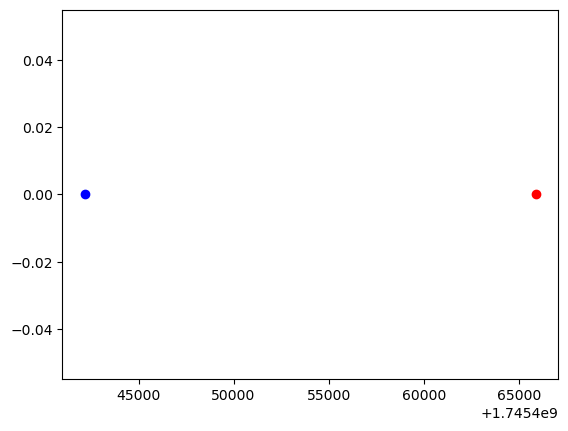

In [52]:
import utils
import matplotlib.pyplot as plt

end = utils.get_seconds_since_epoch(end)

start = utils.get_seconds_since_epoch(start)

points = [x['end_period_ts'] for x in candlesticks['candlesticks']]

x_vals = [start] + points + [end]

# plt.plot(start, 0, 'go',   label='start')           # green dot

plt.plot(end,   0, 'ro',   label='end')             # red dot

plt.scatter(points, [0]*len(points), marker='o', color='blue', label='points')  # blue dots

plt.show()


In [45]:
[market['title'] for market in markets]

for i, market in enumerate(markets):
    if "Detroit" in market['title']:
        print(i, market)

136 {'ticker': 'KXMLBGAME-25APR23SDDET-SD', 'event_ticker': 'KXMLBGAME-25APR23SDDET', 'market_type': 'binary', 'title': 'San Diego vs Detroit Winner?', 'subtitle': '', 'yes_sub_title': 'San Diego', 'no_sub_title': 'San Diego', 'open_time': '2025-04-23T12:15:00Z', 'close_time': '2027-04-23T17:10:00Z', 'expected_expiration_time': '2025-04-23T20:10:00Z', 'expiration_time': '2027-04-23T17:10:00Z', 'latest_expiration_time': '2027-04-23T17:10:00Z', 'settlement_timer_seconds': 500, 'status': 'active', 'response_price_units': 'usd_cent', 'notional_value': 100, 'tick_size': 1, 'yes_bid': 14, 'yes_ask': 15, 'no_bid': 85, 'no_ask': 86, 'last_price': 14, 'previous_yes_bid': 0, 'previous_yes_ask': 0, 'previous_price': 0, 'volume': 10661, 'volume_24h': 10646, 'liquidity': 12225531, 'open_interest': 7716, 'result': '', 'can_close_early': True, 'expiration_value': '', 'category': '', 'risk_limit_cents': 0, 'strike_type': 'structured', 'custom_strike': {'baseball_team': '807fa239-87eb-4e89-a969-649ab20

In [12]:
points

[1745427600]

9

In [55]:
from datetime import datetime, timezone, timedelta



EDT = timezone(timedelta(hours=-4), name="EDT")
end = datetime(2025, 4, 23, 14, 21, tzinfo=EDT)
start = datetime(2025, 4, 23, 12, 24, tzinfo=EDT)
period = "minute"

s_ticker = "KXMLBGAME"
m_ticker = "KXMLBGAME-25APR23STLATL-STL"

candlesticks = client.get_market_candlesticks(s_ticker, m_ticker, start_ts=start, end_ts=end, period_interval=period)
print(candlesticks)


{'ticker': 'KXMLBGAME-25APR23STLATL-STL', 'candlesticks': [{'end_period_ts': 1745425440, 'yes_bid': {'open': 44, 'low': 44, 'high': 47, 'close': 46}, 'yes_ask': {'open': 52, 'low': 50, 'high': 53, 'close': 50}, 'price': {'open': None, 'low': None, 'high': None, 'close': None, 'mean': None, 'previous': 54}, 'volume': 0, 'open_interest': 3803}, {'end_period_ts': 1745425500, 'yes_bid': {'open': 46, 'low': 11, 'high': 50, 'close': 50}, 'yes_ask': {'open': 50, 'low': 49, 'high': 52, 'close': 52}, 'price': {'open': 49, 'low': 49, 'high': 50, 'close': 50, 'mean': 49, 'previous': 54}, 'volume': 93, 'open_interest': 3896}, {'end_period_ts': 1745425560, 'yes_bid': {'open': 50, 'low': 37, 'high': 50, 'close': 37}, 'yes_ask': {'open': 52, 'low': 48, 'high': 60, 'close': 48}, 'price': {'open': 50, 'low': 47, 'high': 50, 'close': 47, 'mean': 47, 'previous': 50}, 'volume': 102, 'open_interest': 3898}, {'end_period_ts': 1745425620, 'yes_bid': {'open': 37, 'low': 37, 'high': 44, 'close': 44}, 'yes_ask'

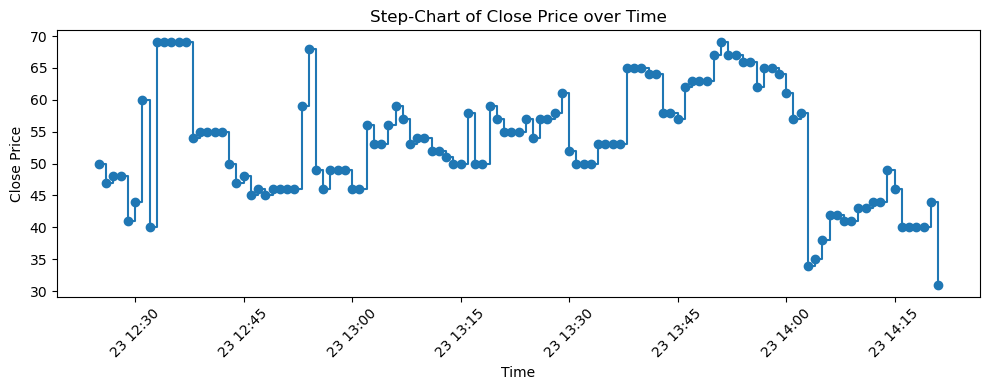